# Concrete Strength Prediction

<b>Objective</b> 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain 85% to 95% accuracy.

Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

 

<b>Resources Available</b>

The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

 

<b>Steps and Tasks:</b>

Exploratory Data Quality Report Reflecting the Following:

1. Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates <b>(10 Marks)</b>

2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. <b>(10 marks)</b>

3. Feature Engineering techniques <b>(10 marks)</b>

    - Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
    - Get the data model ready and do a train test split.
    - Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.
 

Creating the Model and Tuning It:

1. Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). <b>(15 marks)</b>

2. Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. <b>(15 marks)</b>
 

<b>Attribute Information:</b>

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

 

|Name|	Data Type|	Measurement	Description|
|----|-----------|-------------------------|
|Cement (cement)|	quantitative	(kg in a m3 mixture)	|Input Variable|
|Blast Furnace Slag (slag)|	quantitative	(kg in a m3 mixture)	|Input Variable|
|Fly Ash (ash)|	quantitative	(kg in a m3 mixture)	|Input Variable|
|Water(water)|	quantitative	(kg in a m3 mixture)	|Input Variable|
|Superplasticizer (superplastic)|	quantitative	(kg in a m3 mixture)	|Input Variable|
|Coarse Aggregate (coarseagg)|	quantitative	(kg in a m3 mixture)	|Input Variable|
|Fine Aggregate (fineagg)|	quantitative	(kg in a m3 mixture)	|Input Variable|
|Age(age)|	quantitative	(Day (1~365))	|Input Variable|
|Concrete compressive strength(strength)|	quantitative	(MPa)	|Output Variable|

## Import Libraries and Data

In [82]:
#import pandas, numpy, and plotting tools
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
sns.set()

#import relevant learning libraries from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import sklearn.metrics as met

In [2]:
#import data as 'concrete' dataframe using pandas
concrete = pd.read_csv('concrete.csv')

In [3]:
#view data header
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## Exploratory Data Quality Report

### Univariate analysis

Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates (10 Marks)

In [4]:
#look at shape and description of data
concrete.shape, concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


((1030, 9), None)

In [5]:
#look at number of unique values and null values
print(concrete.nunique())
print('')
print(concrete.notnull().sum())

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

cement          1030
slag            1030
ash             1030
water           1030
superplastic    1030
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64


In [6]:
#look at statistical description of data using .describe
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<b>Analysis:</b> Slag, ash, and superplastic all have a large amount of 0 values - the median of ash is 0. Will discuss techniques to replace 0 values, if necessary, in the next sections

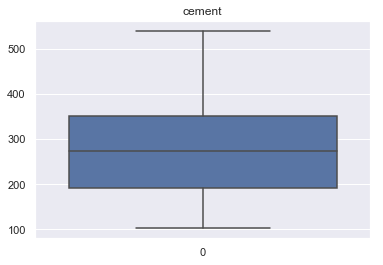

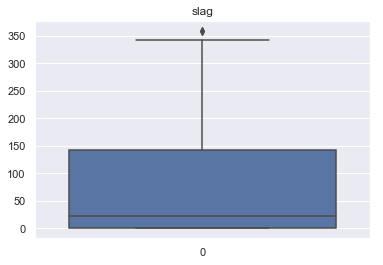

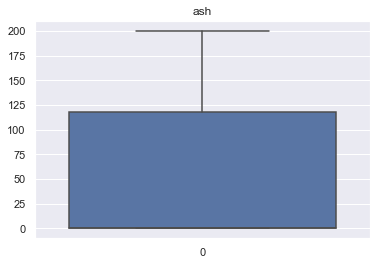

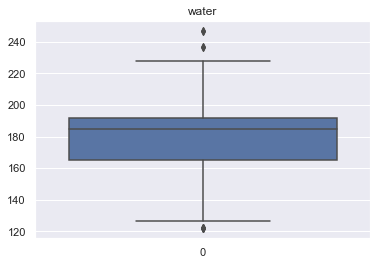

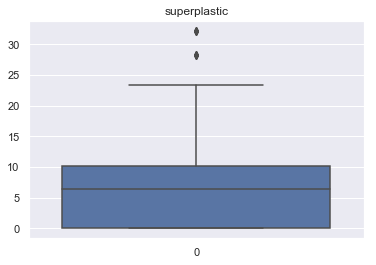

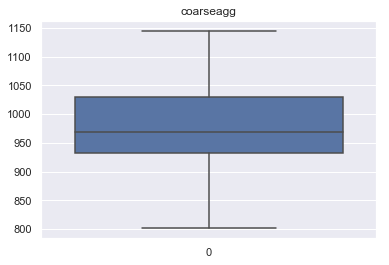

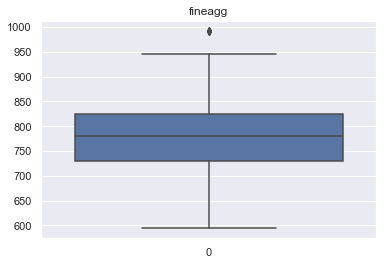

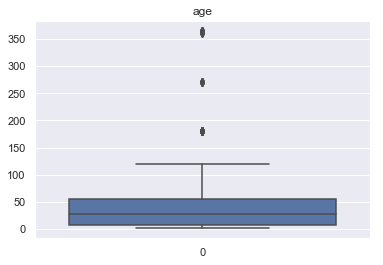

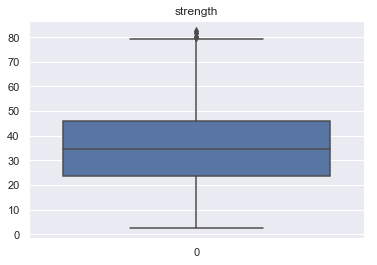

In [7]:
for i in concrete.columns:
    sns.boxplot(data = concrete[i], )
    plt.title(i)
    plt.show()

<b>Analysis:</b> For outliers - slag, water, superplastic, fineagg, age, and strength all have outlier datapoints outside of the box and whiskers plot. Age has the most skewed data and may need to be scaled, dismissed, or categorized in the next section

In [8]:
#identify number of duplicate rows
print(concrete.duplicated().sum())
concrete[concrete.duplicated()]

25


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [9]:
#drop duplicates
concrete.drop_duplicates(keep = 'first', inplace = True)

In [10]:
#confirm duplicates were dropped
concrete.duplicated().sum(), concrete.shape

(0, (1005, 9))

## Bi-variate analysis

Between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)

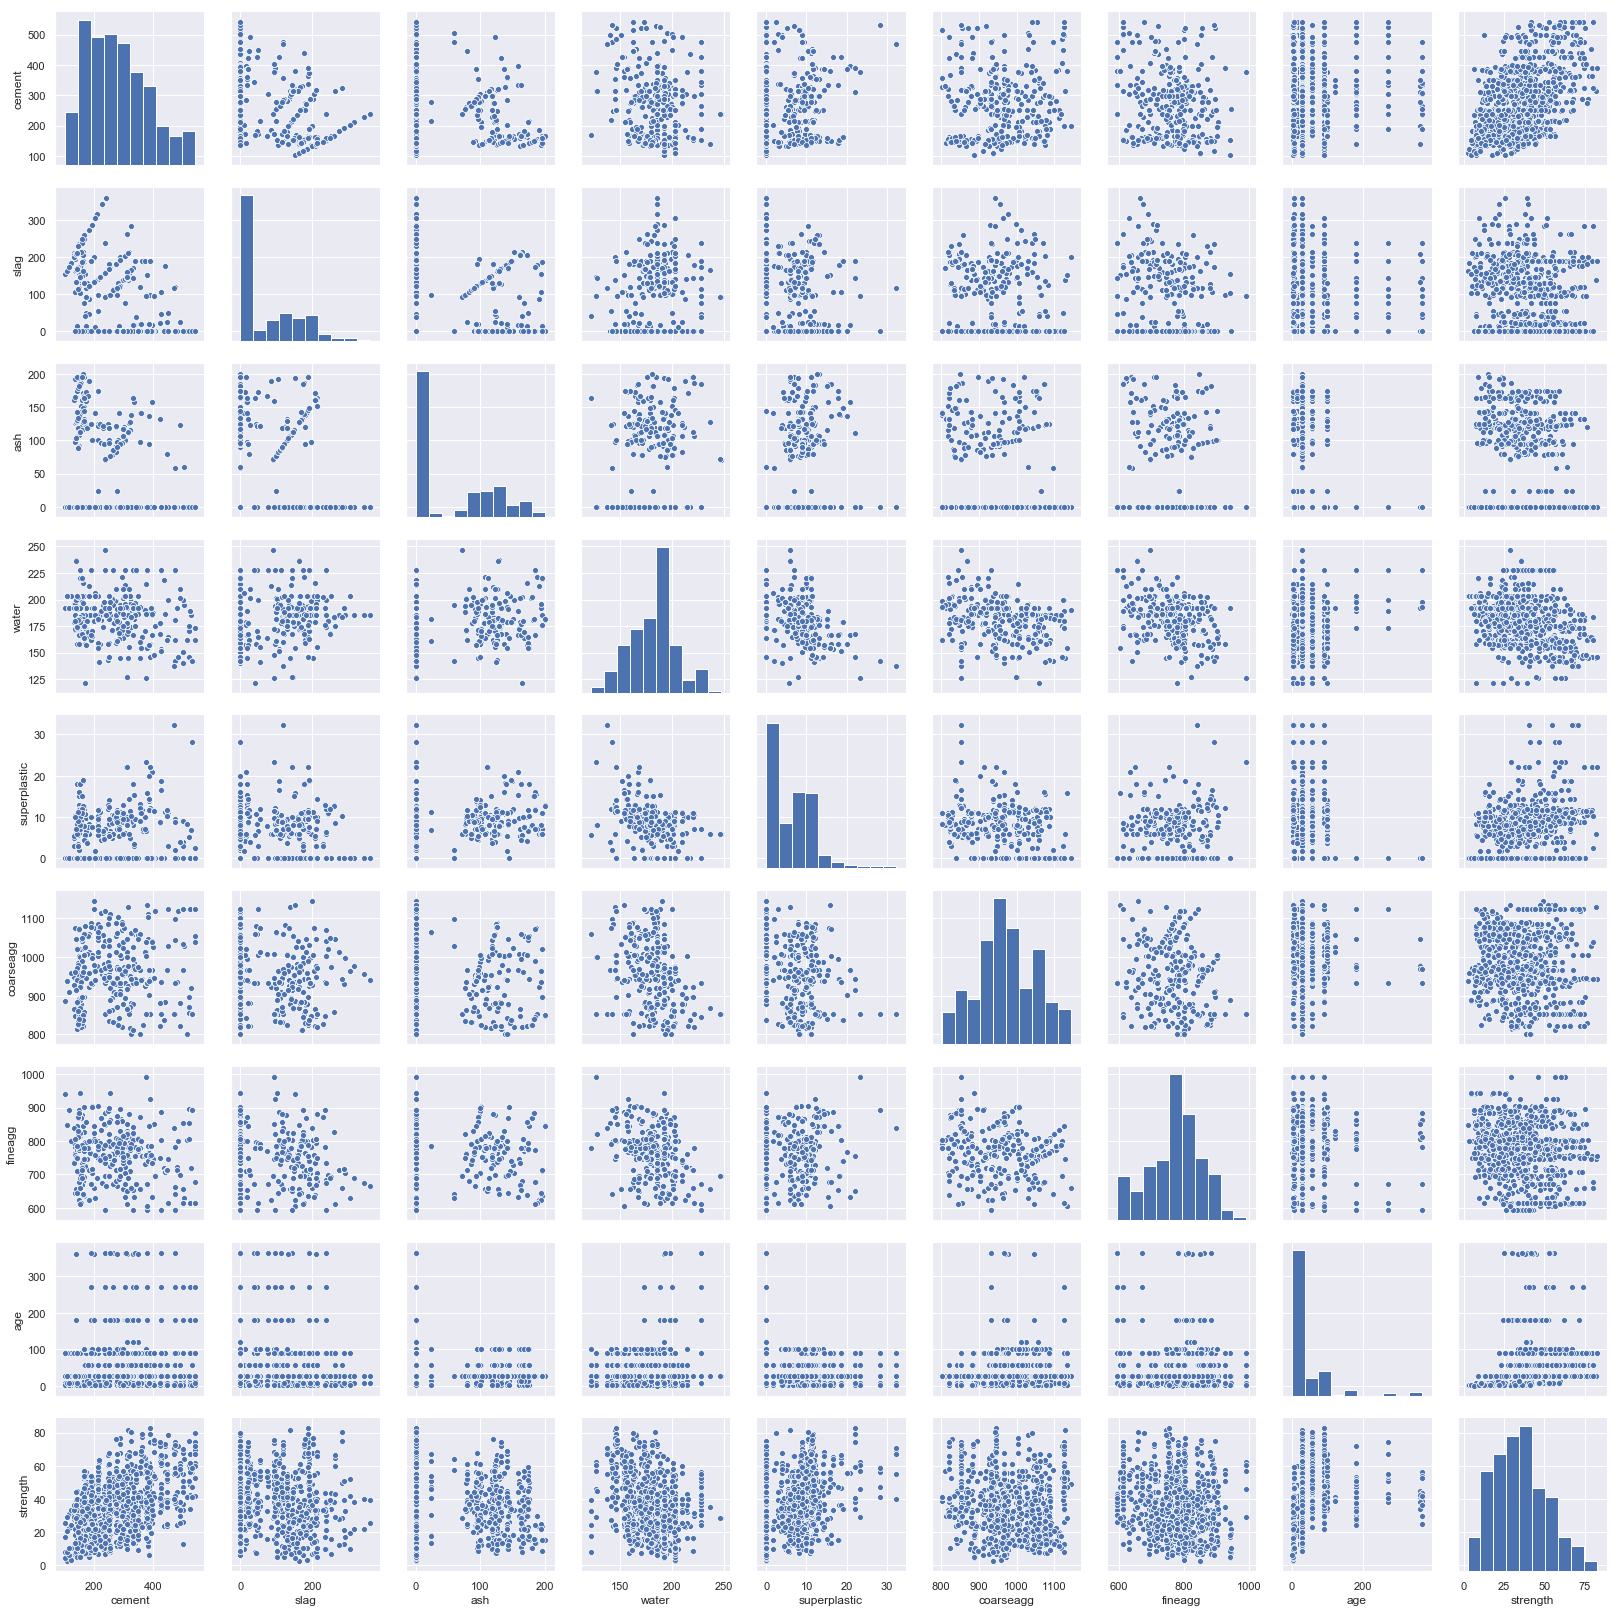

In [18]:
#visualize pairplot of all variables to get an overview of the data
sns.pairplot(data = concrete, diag_kind = 'auto')
plt.show()

In [14]:
#look at correlation matrix for variables
concrete.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


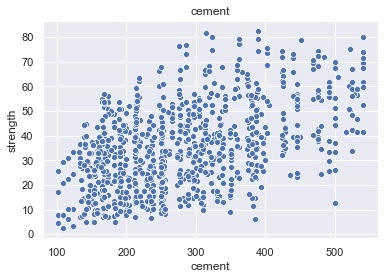

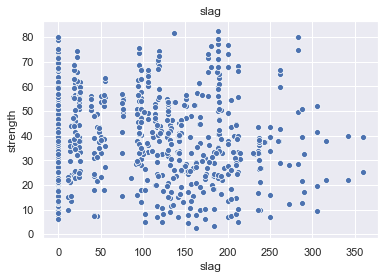

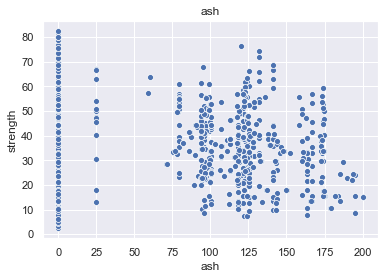

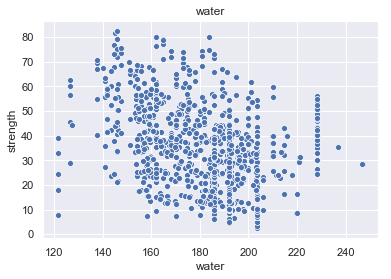

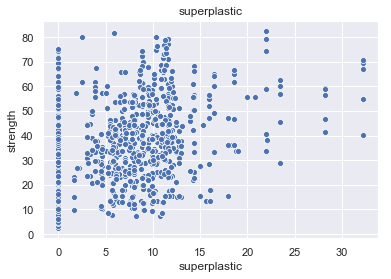

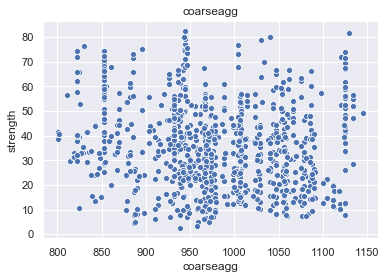

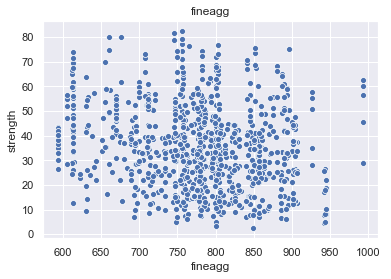

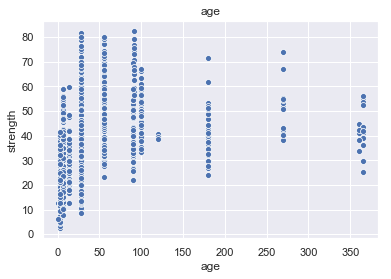

In [13]:
#zoom in on each variable plotted against the output (pairplot above can be hard to see)

for i in concrete.columns[:-1]:
    sns.scatterplot(x = i, y = 'strength', data = concrete)
    plt.title(i)
    plt.show()

<b>

<b>Analysis:</b> The highest correlations between independent variables are "water" and "superplastic" being inversely correlated at -0.65. The variable with the highest correlation with the output is "cement". Higher age is also correlated with a higher strength, although there are many outliers in the data.

The 0 values in various categories result in a high spread of outcomes - from very small to very high. This implies that the data is either missing or irrelevant to the outcome.

## Feature Engineering techniques (10 marks)

1. Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
2. Get the data model ready and do a train test split.
3. Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.

In [66]:
#split the data into training and testing sets
X = concrete.drop(['strength','coarseagg','fineagg'], axis = 1)
y = concrete['strength']

#split data into train, validation, and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

## Creating the Model and Tuning It:

1. Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)

2. Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

### Linear Regression Model

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [141]:
print('The linear regression testing accuracy is', lr.score(X_test, y_test).round(2),'and the training accuracy is', lr.score(X_train, y_train).round(2))

The linear regression testing accuracy is 0.66 and the training accuracy is 0.58


In [52]:
# Evaluate using Cross Validation
from sklearn import model_selection

In [137]:
kfold = model_selection.KFold(n_splits = 20, random_state = 7)
model_selection.cross_val_score(lr,X,y, cv = kfold).mean()

0.5726563594836425

### Decision Tree Model

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
tree = DecisionTreeRegressor(random_state = 7)
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=7, splitter='best')

In [140]:
print('The decision tree testing accuracy is', tree.score(X_test,y_test).round(2),'and the training accuracy is', tree.score(X_train,y_train).round(2))

The decision tree testing accuracy is 0.88 and the training accuracy is 0.99


### Bagging Model

In [109]:
from sklearn.ensemble import BaggingRegressor

In [111]:
bgr = BaggingRegressor()
bgr.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [139]:
print('The bagging testing accuracy is ',bgr.score(X_test,y_test).round(2),'and training accuracy is', bgr.score(X_train,y_train).round(2))

The bagging testing accuracy is  0.91 and training accuracy is 0.98


### Boosting Model

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

In [118]:
boost = GradientBoostingRegressor()
boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [142]:
print('The gradient boosting testing accuracy is', boost.score(X_test,y_test).round(2),'and the training accuracy is', boost.score(X_train,y_train).round(2))

The gradient boosting testing accuracy is 0.91 and the training accuracy is 0.94


### Results and Accuracy Summary

In [143]:
#create pandas dataframe with results
results = {'Linear Regression': [lr.score(X_test, y_test), 
                              lr.score(X_train, y_train)]                               
          }
result_mat = pd.DataFrame(data = results, index = ['Testing Accuracy', 'Training Accuracy'])
result_mat

,Linear Regression
Testing Accuracy,0.655216
Training Accuracy,0.584292


In [145]:
result_mat['Decision Tree'] = [tree.score(X_test, y_test), tree.score(X_train,y_train)]
result_mat['Bagging'] = [bgr.score(X_test,y_test), bgr.score(X_train,y_train)]
result_mat['Gradient Boost'] = [boost.score(X_test,y_test), boost.score(X_train,y_train)]
result_mat.round(3)

,Linear Regression,Decision Tree,Bagging,Gradient Boost
Testing Accuracy,0.655,0.884,0.912,0.914
Training Accuracy,0.584,0.995,0.977,0.938


## Optimization

In [96]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [128]:
param_grid = {'max_depth': np.arange(1,15,1),
              'max_features': [1,2,3,4,5],
              'min_samples_leaf': np.arange(1,10,1),
              'criterion': ['mse','mae']
             
             }
grid = GridSearchCV(tree, param_grid = param_grid, cv = 10)

In [129]:
grid.fit(X_train, y_train)

C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=7, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'max_features': [1, 2, 3, 4, 5], 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [130]:
grid.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test, y_test)))

 Best cross-validation accuracy: 0.82
 Best parameters:  {'criterion': 'mse', 'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 2}
 Test set accuracy: 0.87


C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
